# Non Graded Challenge 12 - Inferential Statistics

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

*Import Dataframe*

In [3]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

Before we do *the Hypothesis Testing*, We will classify the data by its location level first.

In [6]:
df_country = df[df['Location Level'] == 'Country']
df_country

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
5,2020-03-03,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00,1.00
9,2020-03-04,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
13,2020-03-05,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
18,2020-03-06,IDN,Indonesia,2,0,0,2,4,0,0,...,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,2021-11-29,IDN,Indonesia,176,11,419,-254,4256112,143819,4104333,...,-0.789275,0.66,16049.56,0.04,542.33,54.23,3.38%,96.43%,0.67,11.00
21670,2021-11-30,IDN,Indonesia,297,11,324,-38,4256409,143830,4104657,...,-0.789275,1.12,16050.68,0.04,542.38,54.24,3.38%,96.43%,1.69,1.00
21703,2021-12-01,IDN,Indonesia,278,10,307,-39,4256687,143840,4104964,...,-0.789275,1.05,16051.73,0.04,542.41,54.24,3.38%,96.44%,0.94,0.91
21735,2021-12-02,IDN,Indonesia,311,10,388,-87,4256998,143850,4105352,...,-0.789275,1.17,16052.91,0.04,542.45,54.25,3.38%,96.44%,1.12,1.00


In [7]:
df_province = df[df['Location Level'] == 'Province']
df_province

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0,1.0
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0,1.0
6,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21753,2021-12-02,ID-SG,Sulawesi Tenggara,3,0,0,3,20160,527,19583,...,-4.124689,1.14,7649.52,0.00,199.97,20.00,2.61%,97.14%,NaN,1.0
21754,2021-12-02,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,2021-12-02,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.0,1.0
21756,2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.0,1.0


## *Single Sample Hypothesis Testing*

Suppose that during the last 2 years, our country daily new cases of covid-19 is 6600 on average and during the last a year, we reach 6631 a day on average. Is it means that the cases are improved significantly?

In [8]:
daily_newcases = df_country[['Date','New Cases']].groupby('Date').sum()
print('Average New Cases a Day for the last a year: {}'.format(np.round(daily_newcases['New Cases'].mean())))

Average New Cases a Day for the last a year: 6631.0


To check whether the case is significantly increase or not, we will perform the single sample one sided and set the significance level of 0.05. We use this method since we only test a variable and compare the sample (last a year data) and the population (we assume it is the last two years data).

Our hypothesis on this case:

**H0: μ <= 6600**

**H1: μ > 6600**

In [9]:
daily_newcases

,New Cases
Date,
2020-03-02,2
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,2
...,...
2021-11-29,176
2021-11-30,297
2021-12-01,278


In [10]:
t_stat,p_val = stats.ttest_1samp(daily_newcases['New Cases'], 6600)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.46702670356216214
t-statistics: 0.08277862605348962


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


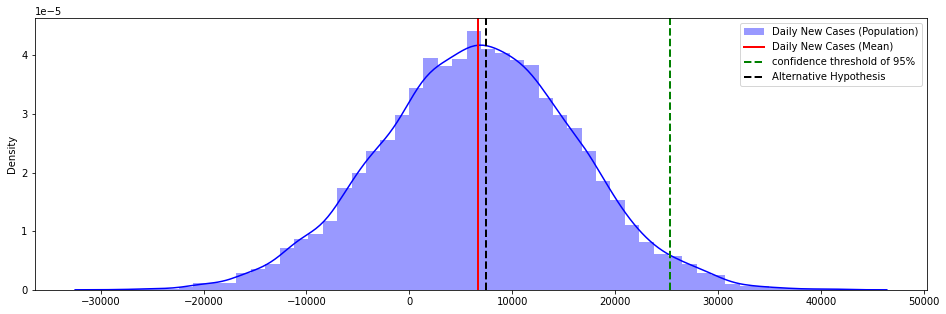

In [11]:
daily_newcases_pop = np.random.normal(daily_newcases['New Cases'].mean(), daily_newcases['New Cases'].std(), 10000)

ci = stats.norm.interval(0.95, daily_newcases['New Cases'].mean(), daily_newcases['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_newcases_pop, label='Daily New Cases (Population)', color='blue')
plt.axvline(daily_newcases['New Cases'].mean(), color='red', linewidth=2, label='Daily New Cases (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_newcases_pop.mean() + t_stat*daily_newcases_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**Since our p-value is more than `0.05`, so we fail to reject the null hypothesis** and we can conclude that, the cases for the last a year is not significantly improved . 

*Note: Variable `t-statistics` refers to how far the alternative hypothesis from null hypothesis away.*

## *One Sample Two Tailed*

Our hypothesis on this case:

**H0: μ = 6600**

**H1: μ != 6600**

In [12]:
t_stat,p_val = stats.ttest_1samp(daily_newcases['New Cases'], 6600)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.9340534071243243
t-statistics: 0.08277862605348962


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


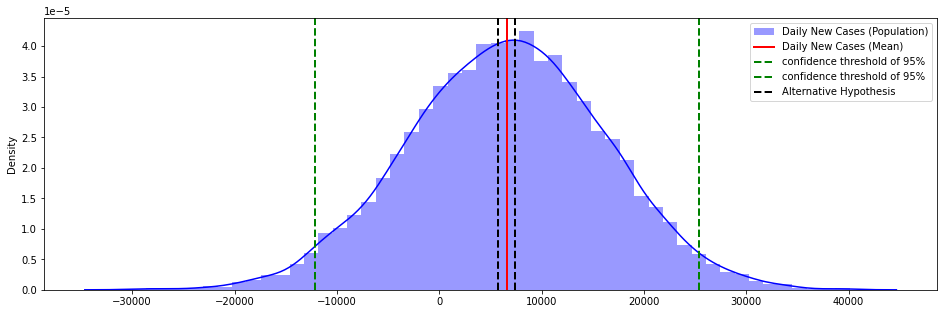

In [13]:
daily_newcases_pop = np.random.normal(daily_newcases['New Cases'].mean(), daily_newcases['New Cases'].std(), 10000)

ci = stats.norm.interval(0.95, daily_newcases['New Cases'].mean(), daily_newcases['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_newcases_pop, label='Daily New Cases (Population)', color='blue')
plt.axvline(daily_newcases['New Cases'].mean(), color='red', linewidth=2, label='Daily New Cases (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_newcases_pop.mean() + t_stat*daily_newcases_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_newcases_pop.mean() - t_stat*daily_newcases_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## *Two Samples Independent Two Tailed Hypothesis Testing*

Now, we want to check, whether daily average of New Cases of two province are significantly different or not using two samples independent two tailed test. We will pick sample of Jawa Barat and Jawa Timur.

In [14]:
daily_jabar = df_province[df_province['Location']=='Jawa Barat'][['Date','New Cases']].groupby('Date').sum()
daily_jatim = df_province[df_province['Location']=='Jawa Timur'][['Date','New Cases']].groupby('Date').sum()

print('Average new cases of Jawa Barat a day: {}'.format(np.round(daily_jabar['New Cases'].mean())))
print('Average new cases of Jawa Timur a day: {}'.format(np.round(daily_jatim['New Cases'].mean())))

Average new cases of Jawa Barat a day: 1106.0
Average new cases of Jawa Timur a day: 639.0


Our hypothesis on this case:

**H0: μ_jabar = μ_jatim**

**H1: μ_jabar != μ_jatim**

In [15]:
t_stat, p_val = stats.ttest_ind(daily_jabar, daily_jatim)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 1.8354765794418267e-08
t-statistics: 5.66341486689403


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


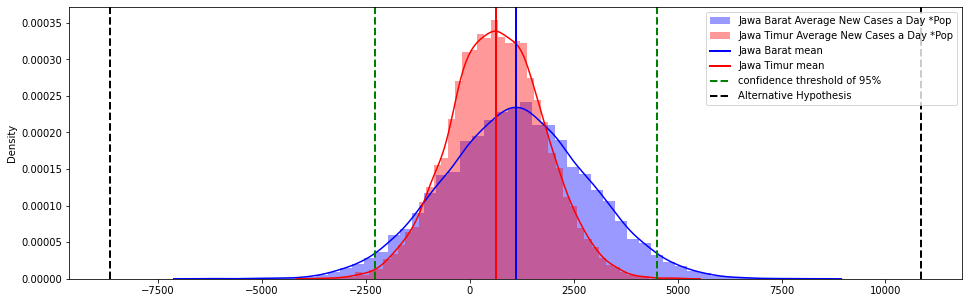

In [16]:
jabar_pop = np.random.normal(daily_jabar['New Cases'].mean(),daily_jabar['New Cases'].std(),10000)
jatim_pop = np.random.normal(daily_jatim['New Cases'].mean(),daily_jatim['New Cases'].std(),10000)

ci = stats.norm.interval(0.95, daily_jabar['New Cases'].mean(), daily_jabar['New Cases'].std())
plt.figure(figsize=(16,5))
sns.distplot(jabar_pop, label='Jawa Barat Average New Cases a Day *Pop',color='blue')
sns.distplot(jatim_pop, label='Jawa Timur Average New Cases a Day *Pop',color='red')

plt.axvline(daily_jabar['New Cases'].mean(), color='blue', linewidth=2, label='Jawa Barat mean')
plt.axvline(daily_jatim['New Cases'].mean(), color='red',  linewidth=2, label='Jawa Timur mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(jabar_pop.mean()+t_stat[0]*jabar_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jabar_pop.mean()-t_stat[0]*jabar_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on the result above, we can conclude that **we reject the null hypothesis** which between Jawa Barat and Jawa Timur are significantly different in terms of average new cases per day.

## *ANOVA*

ANOVA is similar to the t-test. It used for testing whether more than two variables are significantly different or not. So, we will test whether the mean of daily new cases of Sumatera Selatan, Kalimantan Selatan, and Sulawesi Selatan are significantly different or not.

In [17]:
sumsel_newcases = df_province[df_province['Location'] == 'Sumatera Selatan'].groupby('Date').sum()['New Cases']
kalsel_newcases = df_province[df_province['Location'] == 'Kalimantan Selatan'].groupby('Date').sum()['New Cases']
sulsel_newcases = df_province[df_province['Location'] == 'Sulawesi Selatan'].groupby('Date').sum()['New Cases']

print("Daily Average of Sumatera Selatan",sumsel_newcases.mean())
print("Daily Average of Kalimantan Selatan",kalsel_newcases.mean())
print("Daily Average of Sulawesi Selatan",sulsel_newcases.mean())

Daily Average of Sumatera Selatan 96.67258064516129
Daily Average of Kalimantan Selatan 114.07340946166394
Daily Average of Sulawesi Selatan 176.1522435897436


It seems that they are significantly different since `Sumatera Selatan` average is `96`, `Kalimantan Selatan` average is `114` and `Sulawesi Selatan` average is `176`.

In [18]:
f_stat,p_value = stats.f_oneway(sumsel_newcases, kalsel_newcases, sulsel_newcases)
print('P-value:',p_value)

P-value: 1.6767983499587802e-13


**Since the p-value is below 0.05, then we reject the Null Hypothesis.** We conclude that the difference of Sumatra Selatan, Kalimantan Selatan, and Sulawesi Selatan daily new cases is statistically significant.